In [1]:
import sympy as sp
import scipy as sc
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, display_latex

In [20]:
# t, v0, a, g, k, L, m, Cx1, Cx2 = sp.symbols("t, v0, \\alpha, g, k, L, m, C^x_1,  C^x_2")

length = 1500
velocity = 870
koef = 1.3 * 10 ** (-5)
massa = 13.6 * 10 ** (-3)
gravity = 9.8
time = np.linspace(0, 50, 1000)
angles = np.linspace(0, 90, 10000)

In [21]:
def pprint(*el):
    for eq in el:
        display_latex(eq)

In [53]:
def plot(x_axis, y_axis, label, **kwargs):
    fig, ax = plt.subplots()
    ax.plot(x_axis, y_axis, label=label, **kwargs)
    plt.legend()
    plt.grid()
    plt.show()    

## Task 1(1, 2)
We need to calculate the optimal angle for sniper to shoot his enemy. 

At first, we need to consider the motion of the particle w/o air resistance. Than:

$y = y_0 + v_0*sin(\alpha) - \frac{g*t^2}{2}$

$x = x_0 + v_0 * cos(\alpha) * t$

From both eq-n, we can express the full time: $\tau = \frac{2*v_0*sin(\alpha)}{g}$

Now we can find the formula of the length: $L = \frac{v^2_0*sin(2\alpha)}{g}$

And finaly, we can express the formula of max height: $H_{max} = \frac{v^2_0*sin(\alpha)^2}{2g}$

In [37]:
a1 = np.arcsin(length * gravity / velocity**2) / 2
h1 = velocity**2 * np.sin(a1)**2 / 2 / gravity
print(f"Max height: {h1} m\nAngle: {a1} rad")

Max height: 3.6418416633765913 m
Angle: 0.009711272471294132 rad


## Task 1 (3)
We need to find the optimal angle for sniper with considering the air resistance.

#### Condition:

"init": $x_0 = 0, y_0 = 0, \dot{x_0} = v_0*cos(\alpha), \dot{y_0} = v_0 * sin(\alpha), t_0 = 0$

"finish": $x_f = L, y_f = 0, \dot{x_f} = ?, \dot{y_f} = ?, t_f = ?$

#### Force analysis:

Bullet - particle - curve motion:

$G = m * g$, $F_c(t) = -kvV$

#### Solution:

Using the second Newton's Law, we can determine the acceleration of the bullet.

$m\ddot{x} = - k * \sqrt{\dot{x}^2 + \dot{y}^2} * \dot{x}$

$m\ddot{y} = - k * \sqrt{\dot{x}^2 + \dot{y}^2} * \dot{y} - mg$

Now, to find optimal angle and time, we can use the numerical option:

$$ \frac{\mathrm{d}}{\mathrm{d}t}\begin{pmatrix}x \\ y \\ v_x \\ v_y\end{pmatrix} = \begin{pmatrix}v_x \\ v_y \\ -\mu\,v_x\sqrt{v_x^2+v_y^2} \\ -g-\mu\,v_y\sqrt{v_x^2+v_y^2}\end{pmatrix} $$

In [38]:
def system(s, t, k, g, m):
    x, y, vx, vy = s
    return [
        vx,
        vy,
        -k/m * np.sqrt(vx**2 + vy**2) * vx,
        -g - k/m * np.sqrt(vx**2 + vy**2) * vy
    ]

In [44]:
def maxx(arr):
    k = 0
    for i in range(len(arr) - 1):
        if arr[i] >= 0 and arr[i+1] <= 0:
            return i
    return k

Angle: 69.05490549054906, X: 1499.9520478326046m, Y: 2049.7997352036436m, T: 41.74174174174174s


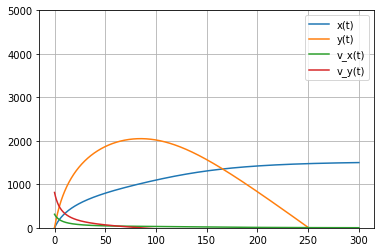

Angle: 69.06390639063906, X: 1499.3992928938542m, Y: 2049.9707073502977m, T: 41.74174174174174s


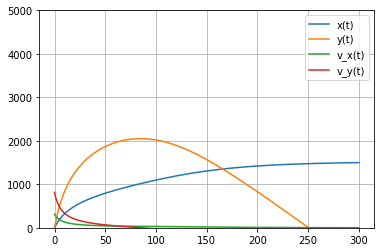

In [47]:
s = []
for angle in angles:
    s0 = [0, 0, velocity * np.cos(angle * np.pi / 180), velocity * np.sin(angle * np.pi / 180)]
    solution = odeint(system, s0, time, args=(koef, gravity, massa))
    x_max = np.max(solution[:,0])
    y_max = np.max(solution[:,1])
    x_index = maxx(solution[:,1])
    if np.ceil(x_max) == length:
        print(f"Angle: {angle}, X: {x_max}m, Y: {y_max}m, T: {time[x_index]}s")
        plot(t, solution, [r"x(t)", r"y(t)", r"v_x(t)", r"v_y(t)"])
        s.append(solution)

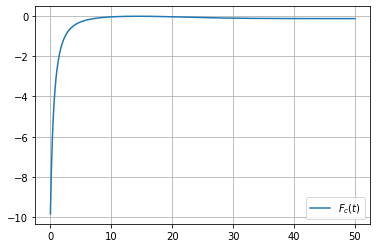

In [54]:
fc = []
ss = s[0]
for i in range(len(s[0][:, 0])):
    vx = ss[:, 2][i]
    vy = ss[:, 3][i]
    f = - koef * np.sqrt(vx**2 + vy**2) ** 2
    fc.append(f)
    
plot(time, fc, r"$F_c(t)$")

## Report for task 1.3

The optimal angle for shoot is $69.0549deg$